In [ ]:
#!Begin

# Masters' in Applied Artificial Intelligence
## Machine Learning Algorithms Course

Notebooks for the MLA course

by [*lufer*](mailto:lufer@ipca.pt)

---



# ML Modelling - Part VIII - Ensemble Machine Learning Models
\
**Contents**:

1.  **Ensemble Models**



This notebook explores the reqyirements adn processes to improve a ML model.

# Environment preparation


**Importing necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

#import libraries for trainning
from sklearn.model_selection import train_test_split


In [ ]:
import datetime
print(f"Last updated: {datetime.datetime.now()}")

Last updated: 2024-03-15 10:43:51.589917


**Mounting Drive**

In [ ]:

from google.colab import drive

# it will ask for your google drive credentiaals
drive.mount('/content/gDrive/', force_remount=True)

Mounted at /content/gDrive/


## Get data

In [ ]:
#read in the dataset
df = pd.read_csv('/content/gDrive/MyDrive/MIA/ColabNotebooks/Datasets/diabetes_data.csv')

#take a look at the data
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#check dataset size
df.shape

(768, 9)

### Check Data Quality

### NaN Values

In [ ]:


df.notna().sum()
#there is no null values
#df.notna().shape

pregnancies    768
glucose        768
diastolic      768
triceps        768
insulin        768
bmi            768
dpf            768
age            768
diabetes       768
dtype: int64

In [ ]:
df.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Prepare Data

In [ ]:
#split data into inputs and targets
X = df.drop(columns = ['diabetes'])
y = df['diabetes']

In [ ]:
X.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


<Axes: xlabel='age', ylabel='insulin'>

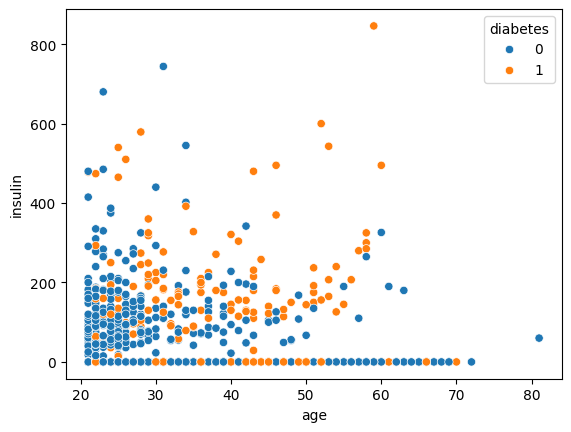

In [ ]:
sns.scatterplot(x=df['age'],y=df['insulin'], hue=df['diabetes'])

### Normalizing and Split the Data

In [ ]:
#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# Scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Create Different Models

### Create and Fit a KNN Model


The principle behind Nearest Neighbor (NN) Methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. The number of samples can be a user-defined constant (k-nearest neighbor learning), or vary based on the local density of points (radius-based neighbor learning).

Neighbors-based methods are known as non-generalizing machine learning methods, since they simply “remember” all of its training data.

Supervised neighbors-based learning comes in two flavors: classification for data with discrete labels, and regression for data with continuous labels.

The kNN algorithm can be considered a voting system, where the majority class label determines the class label of a new data point among its nearest ‘k’ (where k is an integer) neighbors in the feature space.

In this classification problem we'll use the `KNeighborsClassifier`. It implements learning based on the  nearest neighbors of each query point, where
 is an integer value specified by the user.

[See more in...](https://scikit-learn.org/stable/modules/neighbors.html#classification)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

#create new a knn model
knn = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=5)

#fit model to training data
knn_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
#current best model
knn_best = knn_gs.best_estimator_

#check best n_neigbors value
print(knn_gs.best_params_)

{'n_neighbors': 23}


## Create and Fit a RandomForest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#create a new rf classifier
rf = RandomForestClassifier()

#create a dictionary of all values we want to test for n_estimators
params_rf = {'n_estimators': [50, 100, 200]}

#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=5)

#fit model to training data
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 200]})

In [ ]:
#current best model
rf_best = rf_gs.best_estimator_
#rf_best
#check best n_estimators value
print(rf_gs.best_params_)

{'n_estimators': 200}


## Create and Fit a Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

#create a new logistic regression model
log_reg = LogisticRegression()

#fit the model to the training data
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#test the three models with the test data and print their accuracy scores

print('knn: {}'.format(knn_best.score(X_test, y_test)))
print('rf: {}'.format(rf_best.score(X_test, y_test)))
print('log_reg: {}'.format(log_reg.score(X_test, y_test)))

knn: 0.7229437229437229
rf: 0.7835497835497836
log_reg: 0.7532467532467533


### Ensemble all explored models

Ensemble models requires a kind of "voting" process to analyse existing results of the different models.

In [ ]:
from sklearn.ensemble import VotingClassifier

#create a dictionary of our models
estimators=[('knn', knn_best), ('rf', rf_best), ('log_reg', log_reg)]

#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

#fit model to training data
ensemble.fit(X_train, y_train)

#test our model on the test data
res=ensemble.score(X_test, y_test)


In [ ]:

result=pd.DataFrame({"Ensemble":ensemble.score(X_test, y_test), "K-NN":knn_best.score(X_test, y_test),"RF":rf_best.score(X_test, y_test),"LR":log_reg.score(X_test, y_test)},index=[0])
result

,Ensemble,K-NN,RF,LR
0,0.761905,0.722944,0.78355,0.753247


The ensemble model performed better than the individual k-NN, random forest and logistic regression models!